In [3]:
import pandas as pd
import numpy as np
import os
import time
import copy
import pathlib, tempfile

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from graphviz import Digraph
from joblib import Parallel, delayed
from scipy import stats

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
from numba import njit, jit
from lifelines import KaplanMeierFitter, NelsonAalenFitter

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [35]:
dur_A_ = np.random.uniform(0, 10000, 10000)
cens_A_ = np.random.choice(2, 10000)
dur_B_ = np.random.uniform(0, 10000, 100)
cens_B_ = np.random.choice(2, 100)

In [36]:
%%timeit
km = KaplanMeierFitter()
km.fit(dur_A_, cens_A_)
km.survival_function_at_times(dur_A_)

13.7 ms ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit km.survival_function_at_times(dur_A_)

1.53 ms ± 4.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [32]:
km = KaplanMeierFitter()
km.fit(dur_A_, cens_A_)
km.survival_function_at_times([1, 100, 1000, 9000])

1       1.000000
100     0.995288
1000    0.951414
9000    0.321739
Name: KM_estimate, dtype: float64

In [25]:
cens_A_

array([0, 1, 0, ..., 1, 1, 0])

(array([ 951.,  957., 1005.,  950., 1035., 1003.,  971., 1023., 1067.,
        1038.]),
 array([1.85576753e+00, 1.00132002e+03, 2.00078427e+03, 3.00024852e+03,
        3.99971277e+03, 4.99917702e+03, 5.99864127e+03, 6.99810552e+03,
        7.99756977e+03, 8.99703402e+03, 9.99649827e+03]),
 <BarContainer object of 10 artists>)

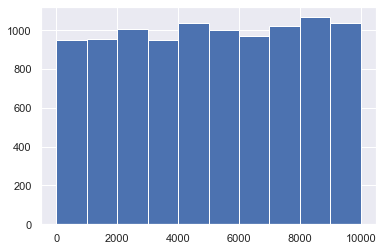

In [31]:
plt.hist(dur_A_)